In [1]:
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from collections import Counter

plt.style.use("default")

data = pd.read_csv("../data/Britannia.csv")

### 1. Distribution of Reviewer Scores

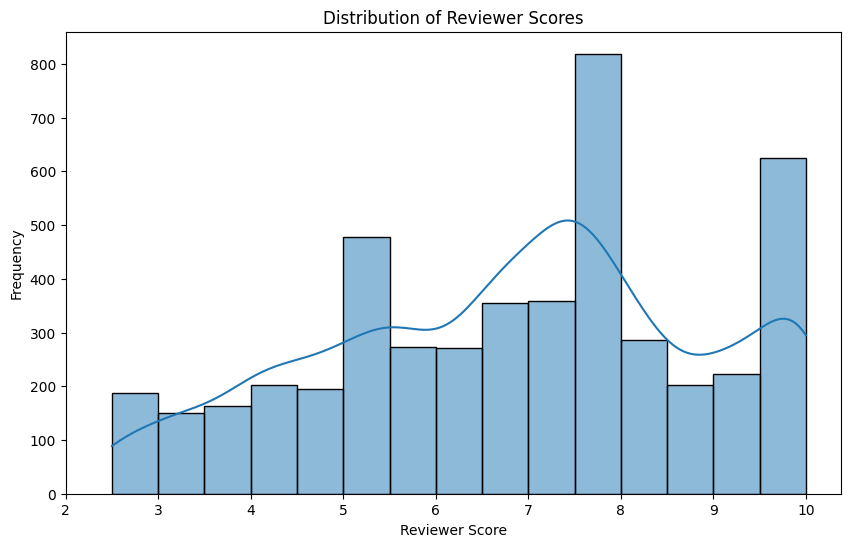

In [2]:
plt.figure(figsize=(10, 6))
sns.histplot(data["Reviewer_Score"], bins=15, kde=True)
plt.title("Distribution of Reviewer Scores")
plt.xlabel("Reviewer Score")
plt.ylabel("Frequency")
plt.xticks(
    range(int(data["Reviewer_Score"].min()), int(data["Reviewer_Score"].max()) + 1)
)
plt.show()

- **Positive Experience**: The majority of scores are skewed towards the higher end (around 8 and 10), which suggests a generally positive sentiment among guests.

- **Room for Improvement**: The notable number of mid-range (5–7) and lower scores (2–4) indicates areas where the hotel might focus on improving to push more experiences into the higher satisfaction range.

- **Focus Areas**: Additional analysis on the review text for scores between 2 and 7 could help identify common issues or areas of concern.

### 2. Average Reviewer Score and Review Count Over Time

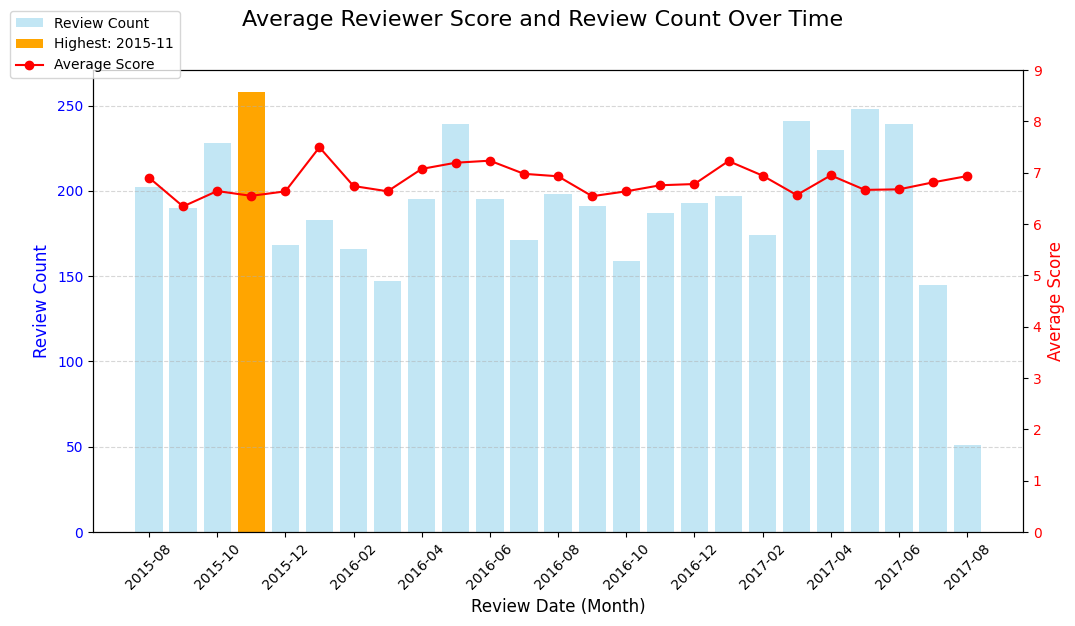

In [3]:
data["Review_Date"] = pd.to_datetime(data["Review_Date"], errors="coerce")
data["Review_Month"] = data["Review_Date"].dt.to_period("M")

monthly_avg_score = data.groupby("Review_Month")["Reviewer_Score"].mean()
monthly_review_count = data.groupby("Review_Month")["Reviewer_Score"].count()

highest_month = monthly_review_count.idxmax()
highest_score = monthly_review_count.max()

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(
    monthly_review_count.index.astype(str),
    monthly_review_count,
    color="skyblue",
    alpha=0.5,
    label="Review Count",
)
ax1.set_xlabel(
    "Review Date (Month)",
    fontsize=12,
)
ax1.set_ylabel("Review Count", fontsize=12, color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax1.bar(
    str(highest_month), highest_score, color="orange", label=f"Highest: {highest_month}"
)

ax2 = ax1.twinx()
ax2.plot(
    monthly_avg_score.index.astype(str),
    monthly_avg_score,
    color="red",
    marker="o",
    label="Average Score",
)
ax2.set_ylabel("Average Score", fontsize=12, color="red")
ax2.tick_params(axis="y", labelcolor="red")
ax2.set_ylim(0, 9)

ax1.set_xticks(range(0, len(monthly_avg_score), 2))
ax1.set_xticklabels(monthly_avg_score.index[::2].astype(str), rotation=45)

fig.suptitle("Average Reviewer Score and Review Count Over Time", fontsize=16)
fig.legend(loc="upper left", bbox_to_anchor=(0.05, 0.99))

ax1.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

- **Stable Guest Satisfaction**: The steady average score indicates that the hotel has maintained a consistent level of service quality over time.

- **Potential High-Demand Periods**: The spike in review count in late 2015 and early 2016 might represent opportunities for special promotions or service enhancements to capitalize on increased demand during similar future periods.

- **Focus on Volume Decline**: The decrease in review counts toward the end of the period could be investigated to understand if it's related to a decrease in bookings, a shift in guest demographics, or other factors.

### 3. Positive and Negative Word Counts Distribution

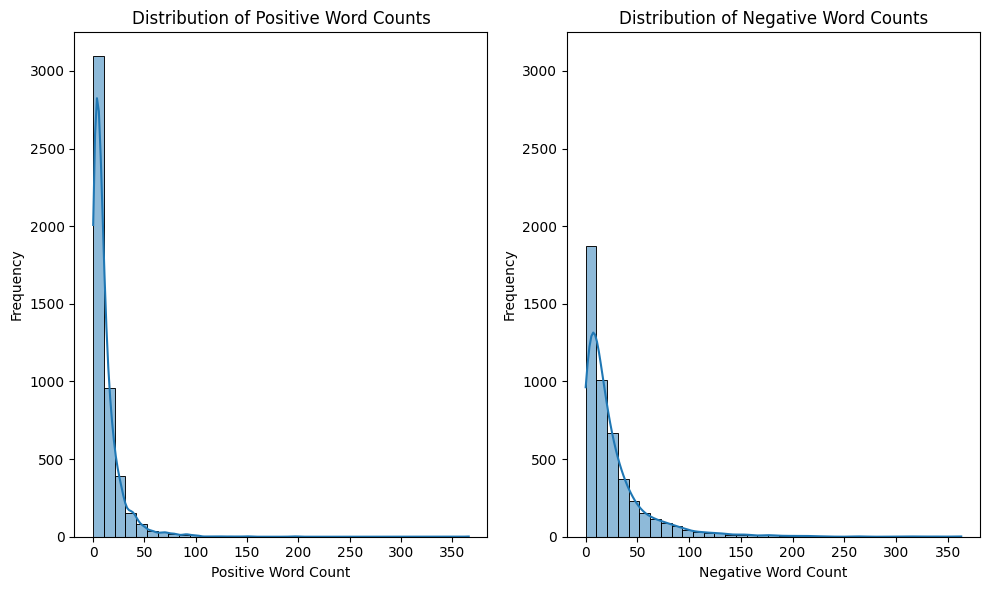

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Positive Word Counts
sns.histplot(data["Review_Total_Positive_Word_Counts"], bins=35, kde=True, ax=ax1)
ax1.set_title("Distribution of Positive Word Counts")
ax1.set_xlabel("Positive Word Count")
ax1.set_ylabel("Frequency")

# Negative Word Counts
sns.histplot(data["Review_Total_Negative_Word_Counts"], bins=35, kde=True, ax=ax2)
ax2.set_title("Distribution of Negative Word Counts")
ax2.set_xlabel("Negative Word Count")
ax2.set_ylabel("Frequency")

y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(0, y_max)
ax2.set_ylim(0, y_max)

plt.tight_layout()
plt.show()

- **Concise Feedback**: The high frequency of low word counts for both positive and negative terms suggests that guests typically provide brief feedback, often highlighting a few key points rather than detailed narratives.

- **Outlier Reviews**: The presence of outliers with very high word counts for both positive and negative words indicates that some guests are highly expressive. Analyzing these outliers could provide in-depth insights into the most passionate experiences (both positive and negative).

- **Sentiment Intensity**: Since there are more outliers with high negative word counts (50-150), it could indicate that guests are more likely to write in-depth when they have a negative experience, compared to a positive one.

### 4. Frequent Positive and Negative Words

In [5]:
from nltk import ngrams

reviews = pd.read_csv("../data/Britannia_Reviews.csv")
positive_reviews = reviews.loc[
    reviews["Sentiment"] == "Positive", "Cleaned_Review"
].dropna()
negative_reviews = reviews.loc[
    reviews["Sentiment"] == "Negative", "Cleaned_Review"
].dropna()


def generate_word_cloud(n):
    positive_bigram_freq = (
        positive_reviews.str.split()
        .apply(lambda x: list(ngrams(x, n)))
        .explode()
        .dropna()
        .apply(lambda x: "_".join(x))
        .value_counts()
    )
    negative_bigram_freq = (
        negative_reviews.str.split()
        .apply(lambda x: list(ngrams(x, n)))
        .explode()
        .dropna()
        .apply(lambda x: "_".join(x))
        .value_counts()
    )

    # Create a positive word cloud from bigram frequencies
    plt.figure(figsize=(10, 6))
    wordcloud = WordCloud(
        width=1000, height=600, background_color="white", colormap="Greens"
    ).generate_from_frequencies(positive_bigram_freq)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Common {n}-grams in Positive Reviews")
    plt.show()

    # Create a negative word cloud from bigram frequencies
    plt.figure(figsize=(10, 6))
    wordcloud = WordCloud(
        width=1000, height=600, background_color="white", colormap="Reds"
    ).generate_from_frequencies(negative_bigram_freq)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Common {n}-grams in Negative Reviews")
    plt.show()

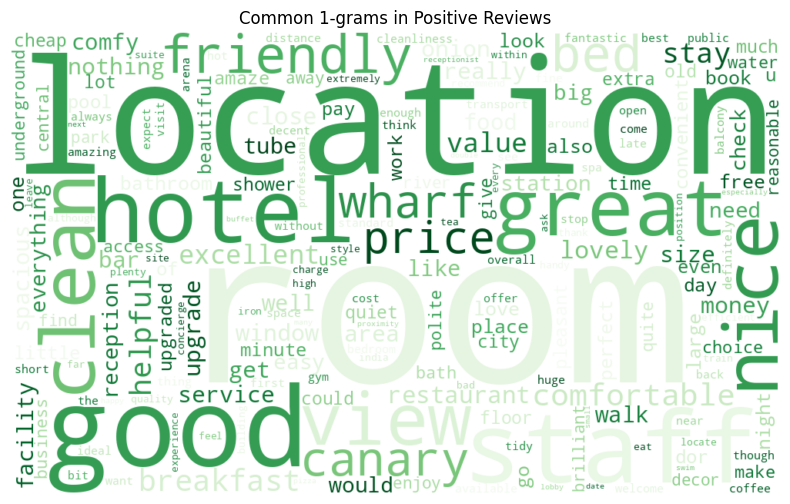

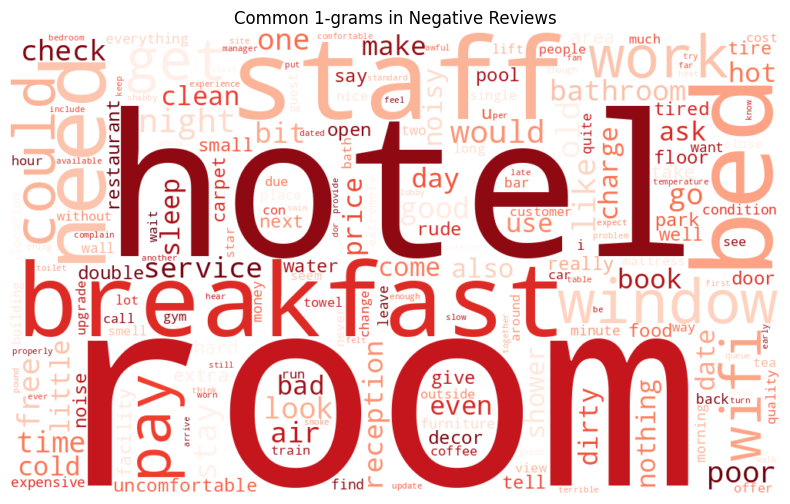

In [6]:
generate_word_cloud(1)

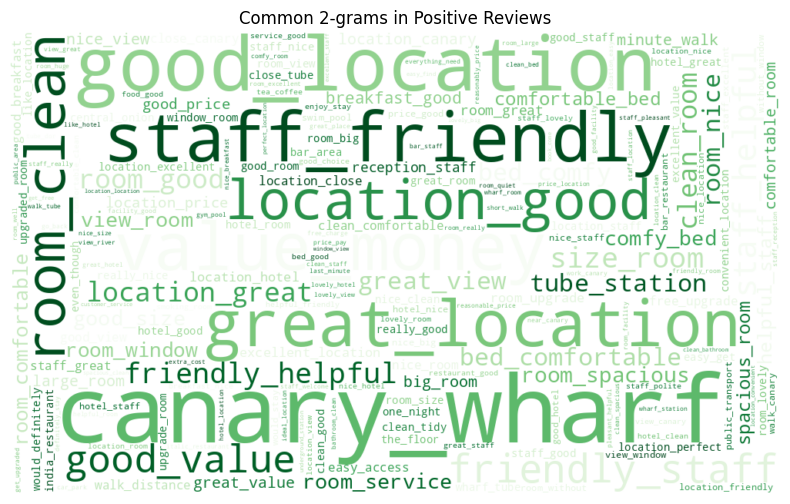

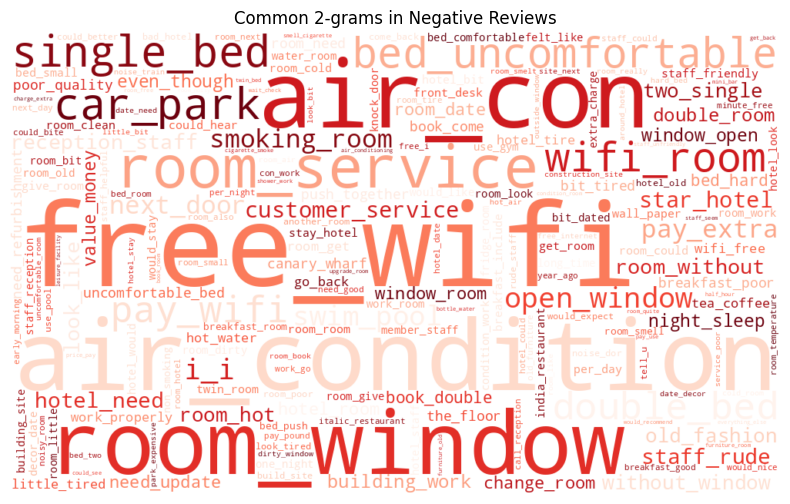

In [7]:
generate_word_cloud(2)

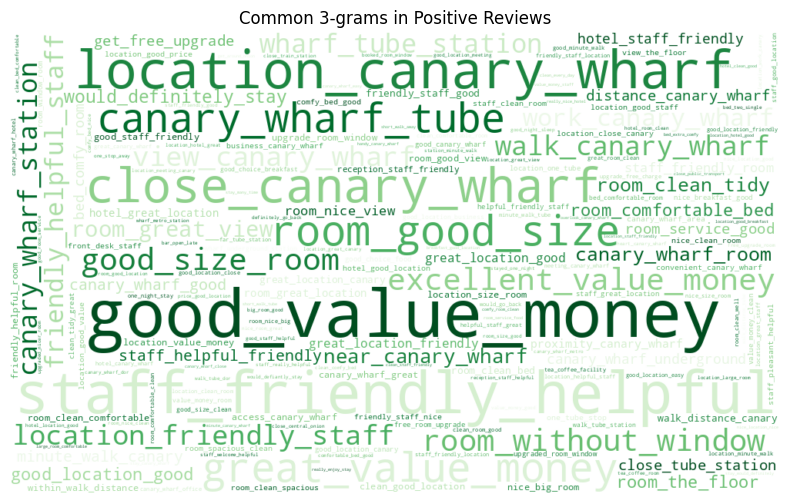

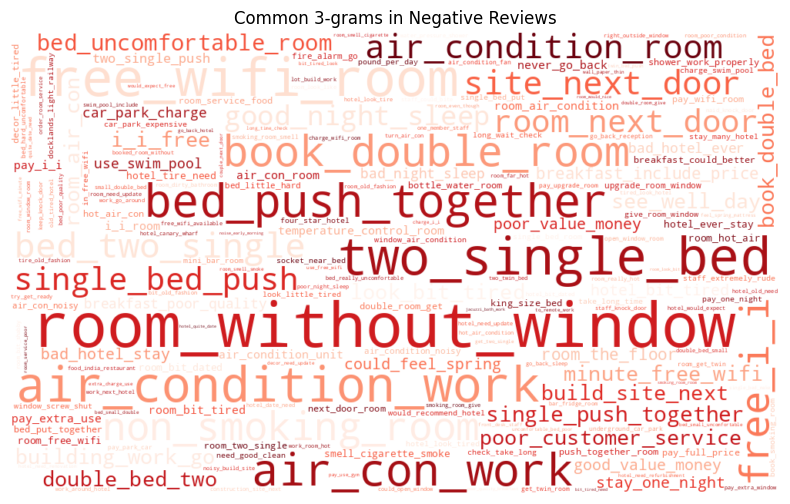

In [8]:
generate_word_cloud(3)

- **Strengths**:
  - **Key Words**: "staff," "location," "room," "clean," "value," "friendly," "comfortable," "good," "helpful," "view."
  - **Insights**:
    - **Staff and Service**: The words "staff," "friendly," and "helpful" highlight the hotel’s strong customer service and attentive staff.
    - **Location Advantage**: "Location" frequently appearing suggests guests find the hotel's placement convenient or desirable.
    - **Room Quality**: Words like "clean," "comfortable," and "good" indicate guests are generally satisfied with the room cleanliness and comfort.
    - **Value for Money**: Phrases like "good value," "value for money," and "great value" suggest that customers feel they receive good returns for the price they pay.
    - **Atmosphere and Views**: Positive mentions of "view" and "nice" indicate a pleasant ambiance appreciated by visitors.

- **Improvement Areas**:
  - **Key Words**: "wifi," "air," "condition," "bed," "room," "breakfast," "dirty," "small," "push," "window," "tired," "noise."
  - **Insights**:
    - **Room Condition and Comfort**: Negative mentions of "bed push together," "room without window," and "tired" imply dissatisfaction with room design, layout, or outdated features.
    - **Cleanliness Issues**: The word "dirty" appearing in some contexts suggests that some rooms or areas may not meet guest expectations for cleanliness.
    - **WiFi and Air Conditioning**: Frequent complaints about "wifi" and "air condition" highlight technical issues that might need urgent attention.
    - **Breakfast Quality**: "Breakfast" appears both positively and negatively, indicating inconsistency in its quality or variety.
    - **Noise Problems**: Mentions of "noise" suggest that some rooms may be poorly insulated or affected by external disturbances, which impacts guest comfort.

### 5. Topic Modeling

In [9]:
from gensim import corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis


def generate_topics(reviews, num_topics, title):
    tokenized_reviews = reviews.str.split()

    dictionary = corpora.Dictionary(tokenized_reviews)
    corpus = [dictionary.doc2bow(text) for text in tokenized_reviews]

    lda_model = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        passes=10,
        random_state=42,
    )

    print(f"\n{title}:")
    for idx, topic in lda_model.print_topics():
        print(f"Topic #{idx+1}: {topic}")

    vis = gensimvis.prepare(lda_model, corpus, dictionary)
    pyLDAvis.display(vis)


generate_topics(positive_reviews, num_topics=5, title="Positive Reviews Topics")
generate_topics(negative_reviews, num_topics=5, title="Negative Reviews Topics")


Positive Reviews Topics:
Topic #1: 0.059*"hotel" + 0.050*"stay" + 0.030*"everything" + 0.025*"restaurant" + 0.023*"need" + 0.021*"would" + 0.018*"good" + 0.017*"convenient" + 0.013*"decor" + 0.012*"comfortable"
Topic #2: 0.083*"view" + 0.081*"room" + 0.049*"good" + 0.046*"nice" + 0.045*"price" + 0.045*"comfortable" + 0.030*"area" + 0.026*"big" + 0.021*"location" + 0.020*"clean"
Topic #3: 0.087*"room" + 0.037*"bed" + 0.025*"clean" + 0.018*"check" + 0.016*"upgrade" + 0.015*"like" + 0.014*"size" + 0.014*"hotel" + 0.013*"also" + 0.012*"comfortable"
Topic #4: 0.174*"location" + 0.094*"good" + 0.059*"great" + 0.042*"value" + 0.030*"hotel" + 0.027*"money" + 0.025*"nothing" + 0.024*"canary" + 0.023*"wharf" + 0.019*"onion"
Topic #5: 0.167*"staff" + 0.082*"friendly" + 0.039*"good" + 0.037*"room" + 0.036*"helpful" + 0.035*"location" + 0.030*"excellent" + 0.029*"nice" + 0.024*"hotel" + 0.021*"breakfast"

Negative Reviews Topics:
Topic #1: 0.037*"breakfast" + 0.025*"room" + 0.011*"get" + 0.011*"po

- Positive Reviews Topics
  - Topic #1: **Overall Hotel Experience** (Key Words: "hotel," "stay," "everything," "restaurant," "need," "decor," "comfortable.")
  - Topic #2: **Views and Comfort** (Key Words: "view," "room," "good," "nice," "price," "comfortable," "area.")
  - Topic #3: **Cleanliness and Upgrades** (Key Words: "room," "bed," "clean," "check," "upgrade," "size," "comfortable.")
  - Topic #4: **Location and Value** (Key Words: "location," "good," "great," "value," "money," "canary," "wharf.")
  - Topic #5: **Staff and Service** (Key Words: "staff," "friendly," "good," "helpful," "location," "breakfast.")

- Negative Reviews Topics
  - Topic #1: **Breakfast Quality** (Key Words: "breakfast," "room," "poor," "get," "hotel," "night.")
  - Topic #2: **WiFi and Costs** (Key Words: "wifi," "pay," "free," "poor," "service," "park," "charge.")
  - Topic #3: **Rude Staff** (Key Words: "staff," "rude," "reception," "nothing," "unhelpful.")
  - Topic #4: **Outdated Rooms** (Key Words: "bed," "hotel," "need," "date," "old," "decor," "tired.")
  - Topic #5: **Noise and Maintenance** (Key Words: "room," "window," "air," "work," "dirty," "noisy," "shower.")

### 6. Top 10 Nationalities by Review Count and Reviewer Score Distribution

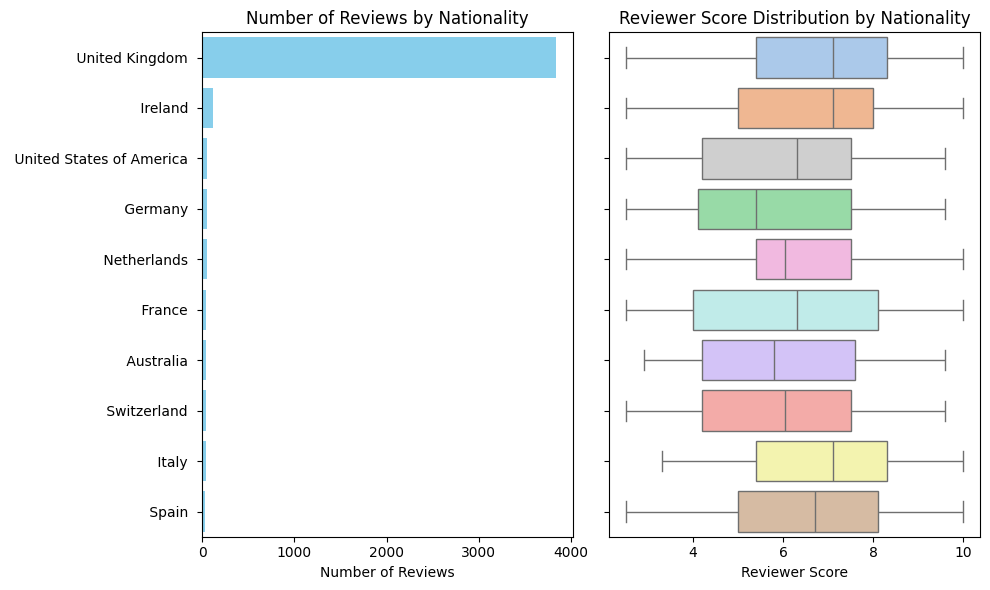

In [10]:
top_nationalities = data["Reviewer_Nationality"].value_counts().nlargest(10)
top_nationality_data = data[data["Reviewer_Nationality"].isin(top_nationalities.index)]

fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(10, 6), gridspec_kw={"width_ratios": [1, 1]}, sharey=True
)

ax1.barh(top_nationalities.index, top_nationalities.values, color="skyblue")
ax1.set_xlabel("Number of Reviews")
ax1.set_title("Number of Reviews by Nationality")

sns.boxplot(
    data=top_nationality_data,
    x="Reviewer_Score",
    y="Reviewer_Nationality",
    order=top_nationalities.index,
    ax=ax2,
    palette="pastel",
    hue="Reviewer_Nationality",
    legend=False,
)
ax2.set_xlabel("Reviewer Score")
ax2.set_title("Reviewer Score Distribution by Nationality")

ax2.set_ylabel("")

plt.tight_layout()
plt.show()

- **UK as a Core Market:**: The vast majority of reviews come from the United Kingdom, which is significantly higher than any other nationality. This could indicate that the hotel primarily attracts domestic guests or that it is more popular among UK residents.

- **International Market Variability**: Each nationality exhibits a wide range of scores, indicating diverse experiences across different guest backgrounds. Despite this variability, certain countries show notable trends in their score distributions.

- **Potential Targeted Improvements**:
    - Since guests from the UK show a wider range of scores, it may be beneficial for the hotel to focus on factors that could impact the consistency of domestic guest experiences.
    - The hotel could also review specific feedback from German, Australia, and Switzerland guests to understand the occasional negative experiences in these groups and address specific needs or concerns.

### 7. Tags Analysis

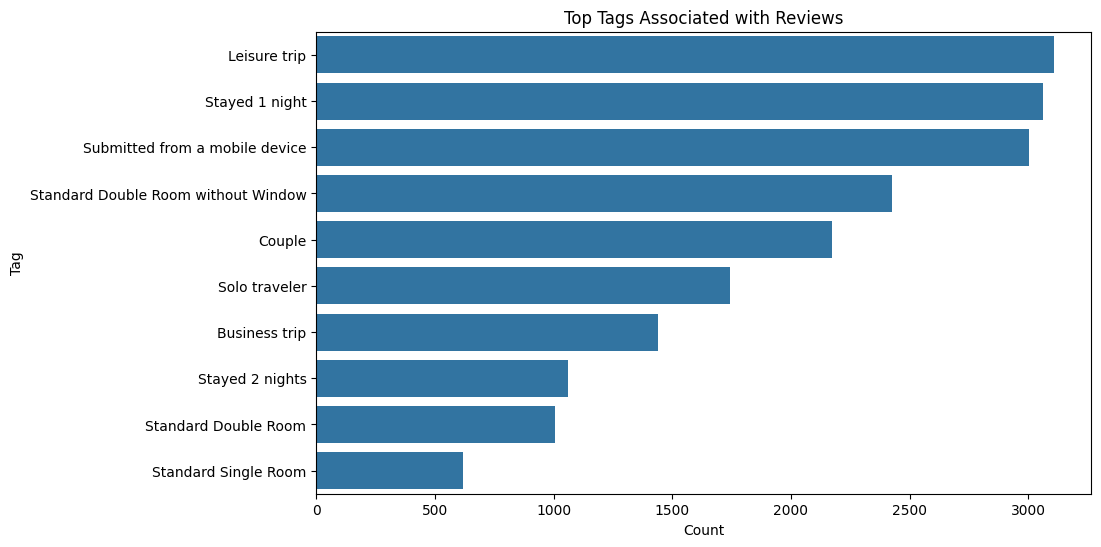

In [11]:
tags = data["Tags"].dropna().apply(lambda x: ast.literal_eval(x))
all_tags = [tag.strip() for sublist in tags for tag in sublist]

tag_counts = Counter(all_tags).most_common(10)
tag_df = pd.DataFrame(tag_counts, columns=["Tag", "Count"])

plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Tag", data=tag_df)
plt.title("Top Tags Associated with Reviews")
plt.xlabel("Count")
plt.ylabel("Tag")
plt.show()

- **Target Audience**: The hotel appears to cater predominantly to leisure travelers, with a high frequency of single-night stays and popularity among couples. This positions the hotel as a good option for quick leisure trips rather than long stays.

- **Room Preferences**: The popularity of the "Standard Double Room without Window" tag could indicate that guests often select this option, possibly for cost reasons.

- **Mobile-Friendly Services**: Since a significant number of reviews are submitted via mobile devices, the hotel could benefit from optimizing its mobile services, including booking and customer support.

- **Business Segment Opportunities88: Though business trips are fewer, they still represent a notable portion of the tags. Enhancing amenities for business travelers could help attract more of this segment.